In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Penyakit yang akan dianalisis yakni Coronary Heart Disease atau Jantung Koroner
Adapun fitur-fitur yang terdapat antara lain :
1. sisystolic blood pressure => Nilai tekanan darah sistol
2. yearly tobacco use (in kg) => Tingkat penggunaan rokok per tahun dalam satuan kilogram
3. low density lipoprotein (Idl) => Jenis protein yang bertanggung jawab atas plak lemak di pembuluh darah
4. adiposity => Tingkatan atau keadaan seseorang dinilai mengalami kegemukan / obesitas
5. family history (0 or 1) => Riwayat jantung koroner pada keluarga dalam satuan biner (tidak atau ya)
6. type A personality score (typea) => Nilai kepribadian dalam status Type A
6. obesity (body mass index) => Tingkatan obesitas atau body mass index (BMI)
7. alcohol use => Kadar alkohol yang digunakan
8. age => Umur
9. the diagnosis of CHD (0 or 1) => Hasil analisis terjangkit CHD dalam satuan biner (tidak atau ya)

In [44]:
#Membaca data dari format CSV dan menampilkan hasil data
data = pd.read_csv('CHDdata.csv')

data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [45]:
#Menampilkan 5 Data Teratas

data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [46]:
#Menampilkan 5 Data Terbawah

data.tail()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [47]:
# Import LabelEncoder
from sklearn import preprocessing

#Membuat objek label encoder untuk mempermudah konversi label
le = preprocessing.LabelEncoder()

#Dilakukan konversi label famhist menjadi nomor untuk mempermudah perhitungan
famhist_encoded = le.fit_transform(data['famhist'])

#Menyimpan kembali array famhist yang telah di konversi labelnya
data['famhist'] = famhist_encoded

data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [48]:
#Menampilkan data info jumlah fitur, baris dan tipe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int32  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 34.4 KB


In [49]:
#Cek apakah terdapat data yang hilang atau tidak memiliki nilai pada seluruh kolom fitur
data.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [50]:
#Cek apakah terdapat data dengan nilai null
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Seluruh data terisi atau lengkap, sehingga proses dapat dilanjutkan

In [51]:
#Menyimpan data korelasi dan menampilkan seluruh data

korelasi = data.corr()
korelasi

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.100095,0.062531,0.372973,1.000000


<AxesSubplot:>

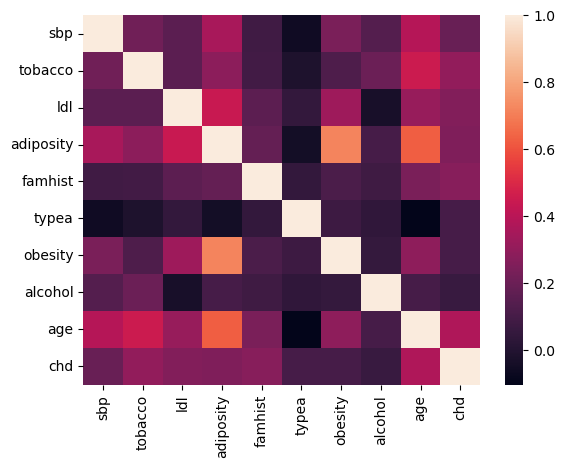

In [52]:
sns.heatmap(korelasi)

Dari seluruh data korelasi didapatkan 5 dari 9 fitur dengan korelasi tertinggi seseorang dinyatakan menderita jantung koroner yakni,

1. yearly tobacco use (in kg) => Tingkat penggunaan rokok per tahun dalam satuan kilogram
2. low density lipoprotein (Idl) => Jenis protein yang bertanggung jawab atas plak lemak di pembuluh darah
3. adiposity => Tingkatan atau keadaan seseorang dinilai mengalami kegemukan / obesitas
4. age => Umur
5. family history (0 or 1) => Riwayat jantung koroner pada keluarga dalam satuan biner (tidak atau ya)

sehingga fitur lain dari yang disebutkan dapat dihapuskan

In [53]:
data.drop('sbp', inplace=True, axis=1)
data.drop('typea', inplace=True, axis=1)
data.drop('obesity', inplace=True, axis=1)
data.drop('alcohol', inplace=True, axis=1)

data

,tobacco,ldl,adiposity,famhist,age,chd
0,12.00,5.73,23.11,1,52,1
1,0.01,4.41,28.61,0,63,1
2,0.08,3.48,32.28,1,46,0
3,7.50,6.41,38.03,1,58,1
4,13.60,3.50,27.78,1,49,1
...,...,...,...,...,...,...
457,0.40,5.98,31.72,0,58,0
458,4.20,4.41,32.10,0,52,1
459,3.00,1.59,15.23,0,55,0
460,5.40,11.61,30.79,0,40,0


Dari seluruh data yang didapat kemudian akan dicek kualitas 5 fitur utama

In [54]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
batas_atas = (data > (Q3 + 1.5 * IQR))
batas_bawah = (data < (Q1 - 1.5 * IQR))

print('Menampilkan jumlah total outlier untuk setiap fitur')
(batas_bawah | batas_atas).sum()

Menampilkan jumlah total outlier untuk setiap fitur


tobacco      19
ldl          14
adiposity     0
famhist       0
age           0
chd           0
dtype: int64

In [55]:
# # PERHITUNGAN DINAMIS MULTI DATA
# data_delete_index = pd.Index([], dtype='int64')
# for col in data.columns:
# # if((col == 'tobacco') | (col == 'ldl')):
#     q1 , q3 = data[col].quantile(0.25), data[col].quantile(0.75)
#     iqr = q3 - q1
#     batas_atas = q3 + (1.5*iqr)
#     batas_bawah = q1 - (1.5*iqr)

# #     Add data deletion
#     data_delete_index = df_delete.union(data[(data[col] < batas_bawah) | (data[col] > batas_atas)].index)

# #     Print for every title
#     print("======="+str(col).capitalize()+"======")
#     print("Quartil 1 " + str(col).capitalize() + " : " + str(q1))
#     print("Quartil 3 " + str(col).capitalize() + " : " + str(q3))
#     print("Batas Atas " + str(col).capitalize() + " : " + str(batas_atas))
#     print("Batas Bawah " + str(col).capitalize() + " : " + str(batas_bawah))
#     print("Index Outlier :")
#     print(data[(data[col] < batas_bawah) | (data[col] > batas_atas)].index)
#     print('\n')

# print("Data Index Outlier Total")
# print(data_delete_index)

Dari nilai tersebut diketahui bahwa masih terdapat nilai outlier untuk fitur ldl sebanyak 14 dan tobacco sebanyak 19

<AxesSubplot:xlabel='tobacco'>

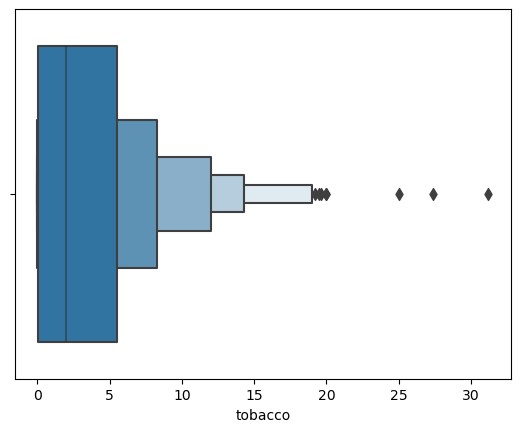

In [56]:
sns.boxenplot(x="tobacco", data=data)

In [57]:
#Perhitungan mencari outlier dari nilai
q1_tobacco, q3_tobacco = np.percentile(data["tobacco"], [25, 75])
iqr_tobacco = q3_tobacco - q1_tobacco
batas_atas_tobacco = q3_tobacco + (1.5 * iqr_tobacco)
batas_bawah_tobacco = q1_tobacco - (1.5 * iqr_tobacco)

print("Quartil Tobacco 1 : " + str(q1_tobacco))
print("Quartil Tobacco 3 : " + str(q3_tobacco))
print("Batas Atas Tobacco :" + str(batas_atas_tobacco))
print("Batas Bawah Tobacco : " + str(batas_bawah_tobacco))

Quartil Tobacco 1 : 0.052500000000000005
Quartil Tobacco 3 : 5.5
Batas Atas Tobacco :13.67125
Batas Bawah Tobacco : -8.11875


In [58]:
#Mencari data outlier tobacco

df_tobacco_delete = data[(data["tobacco"] < batas_bawah_tobacco) |
                         (data['tobacco'] > batas_atas_tobacco)]
df_tobacco_delete

,tobacco,ldl,adiposity,famhist,age,chd
11,14.10,4.44,22.39,1,40,1
19,14.00,6.23,35.96,1,59,1
24,18.20,4.34,24.38,0,50,0
114,31.20,3.17,14.99,0,59,1
140,14.00,5.90,37.12,0,54,1
149,15.50,5.05,24.06,0,61,1
161,27.40,3.12,26.63,0,62,1
179,15.00,4.91,34.65,0,56,0
186,20.00,6.40,35.04,0,63,0
235,18.00,4.13,27.43,0,51,1


Dari total perhitungan untuk fitur tobacco didapatkan hasil outlier berjumlah 19.

<AxesSubplot:xlabel='ldl'>

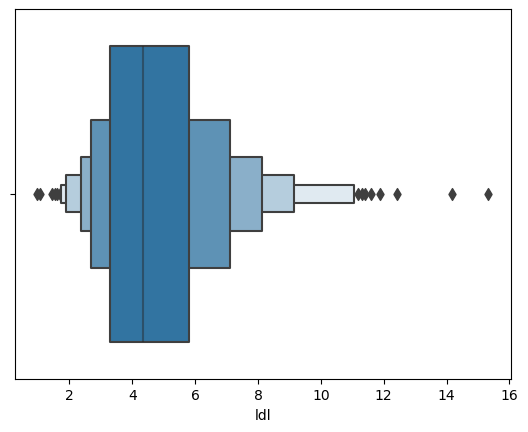

In [59]:
sns.boxenplot(x="ldl", data=data)

In [60]:
#Perhitungan mencari outlier dari nilai
q1_ldl, q3_ldl = np.percentile(data["ldl"], [25, 75])
iqr_ldl = q3_ldl - q1_ldl
batas_atas_ldl = q3_ldl + (1.5 * iqr_ldl)
batas_bawah_ldl = q1_ldl - (1.5 * iqr_ldl)

print("Quartil LDL 1 : " + str(q1_ldl))
print("Quartil LDL 3 : " + str(q3_ldl))
print("Batas Atas LDL : " + str(batas_atas_ldl))
print("Batas Bawah LDL : " + str(batas_bawah_ldl))

Quartil LDL 1 : 3.2824999999999998
Quartil LDL 3 : 5.79
Batas Atas LDL : 9.55125
Batas Bawah LDL : -0.4787500000000007


In [61]:
#Mencari data outlier ldl (low density lipoprotein)

df_ldl_delete = data[(data["ldl"] < batas_bawah_ldl) |
                     (data['ldl'] > batas_atas_ldl)]
df_ldl_delete

,tobacco,ldl,adiposity,famhist,age,chd
16,7.50,15.33,22.00,0,49,0
25,4.00,12.42,31.29,1,42,1
26,6.00,9.65,33.91,0,48,0
98,3.20,11.32,35.36,1,51,1
115,0.00,10.58,31.81,1,48,0
125,8.60,11.17,35.28,1,59,1
243,0.76,10.53,35.66,0,55,1
345,0.52,11.89,27.68,1,26,1
382,1.68,11.41,29.54,1,38,1
387,4.50,10.49,33.27,0,53,1


Dari total perhitungan untuk fitur ldl didapatkan hasil outlier berjumlah 14.

<AxesSubplot:xlabel='adiposity'>

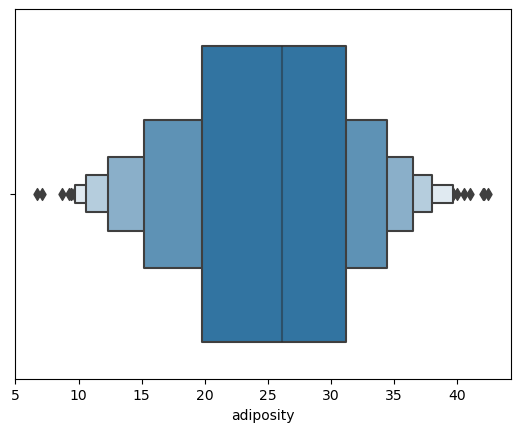

In [62]:
sns.boxenplot(x="adiposity", data=data)

In [63]:
#Perhitungan mencari outlier dari nilai
q1_adiposity, q3_adiposity = np.percentile(data["adiposity"], [25, 75])
iqr_adiposity = q3_adiposity - q1_adiposity
batas_atas_adiposity = q3_adiposity + (1.5 * iqr_adiposity)
batas_bawah_adiposity = q1_adiposity - (1.5 * iqr_adiposity)

print("Quartil Adiposity 1 : " + str(q1_adiposity))
print("Quartil Adiposity 3 : " + str(q3_adiposity))
print("Batas Atas Adiposity : " + str(batas_atas_adiposity))
print("Batas Bawah Adiposity : " + str(batas_bawah_adiposity))

Quartil Adiposity 1 : 19.775
Quartil Adiposity 3 : 31.2275
Batas Atas Adiposity : 48.40625
Batas Bawah Adiposity : 2.5962499999999977


In [64]:
#Mencari data outlier adiposity

df_adiposity_delete = data[(data["adiposity"] < batas_bawah_adiposity) |
                           (data['adiposity'] > batas_atas_adiposity)]
df_adiposity_delete

,tobacco,ldl,adiposity,famhist,age,chd


Dari total perhitungan untuk fitur adiposity tidak didapatkan hasil outlier.

<AxesSubplot:xlabel='age'>

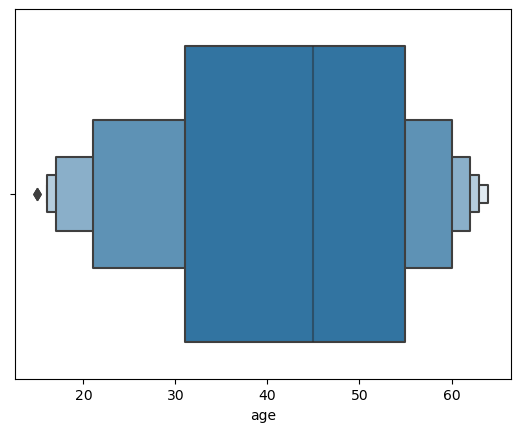

In [65]:
sns.boxenplot(x="age", data=data)

In [66]:
#Perhitungan mencari outlier dari nilai
q1_age, q3_age = np.percentile(data["age"], [25, 75])
iqr_age = q3_age - q1_age
batas_atas_age = q3_age + (1.5 * iqr_age)
batas_bawah_age = q1_age - (1.5 * iqr_age)

print("Quartil Age 1 : " + str(q1_age))
print("Quartil Age 3 : " + str(q3_age))
print("Batas Atas Age : " + str(batas_atas_age))
print("Batas Bawah Age : " + str(batas_bawah_age))

Quartil Age 1 : 31.0
Quartil Age 3 : 55.0
Batas Atas Age : 91.0
Batas Bawah Age : -5.0


In [67]:
#Mencari data outlier age (umur)

df_age_delete = data[(data["age"] < batas_bawah_age) |
                     (data['age'] > batas_atas_age)]
df_age_delete

,tobacco,ldl,adiposity,famhist,age,chd


Dari total perhitungan untuk fitur age tidak didapatkan hasil outlier.

In [68]:
#Menggabungkan seluruh data fitur outlier yang diperoleh sebelumnya
data_delete_index = df_tobacco_delete['tobacco'].index
data_delete_index = data_delete_index.union(df_ldl_delete['ldl'].index)
data_delete_index = data_delete_index.union(
    df_adiposity_delete['adiposity'].index)
data_delete_index = data_delete_index.union(df_age_delete['age'].index)

data_delete_index

# data_delete_np =  data_delete_index.to_numpy()
# data_delete_length = max([len(i) for i in data_delete_index])

Int64Index([ 11,  16,  19,  24,  25,  26,  98, 114, 115, 125, 140, 149, 161,
            179, 186, 235, 243, 284, 306, 333, 345, 382, 384, 387, 404, 406,
            407, 410, 412, 416, 422, 460],
           dtype='int64')

In [69]:
#Menghapus seluruh data outlier
data = data.drop(data_delete_index)
data

,tobacco,ldl,adiposity,famhist,age,chd
0,12.00,5.73,23.11,1,52,1
1,0.01,4.41,28.61,0,63,1
2,0.08,3.48,32.28,1,46,0
3,7.50,6.41,38.03,1,58,1
4,13.60,3.50,27.78,1,49,1
...,...,...,...,...,...,...
456,0.40,4.11,42.06,1,57,0
457,0.40,5.98,31.72,0,58,0
458,4.20,4.41,32.10,0,52,1
459,3.00,1.59,15.23,0,55,0


In [70]:
# #Perhitungan mencari outlier dari nilai
# q1_famhist, q3_famhist = np.percentile(data["famhist"], [25,75])
# iqr_famhist = q3_famhist - q1_famhist
# batas_atas_famhist = q3_famhist + (1.5*iqr_famhist)
# batas_bawah_famhist = q1_famhist - (1.5*iqr_famhist)

# print("Quartil Famhist 1 : " + str(q1_famhist))
# print("Quartil Famhist 3 : " + str(q3_famhist))
# print("Batas Atas Family History : " + str(batas_atas_famhist))
# print("Batas Bawah Family History : " + str(batas_bawah_famhist))

In [71]:
# #Mencari data outlier Famhist (Histori Keluarga)

# df_famhist_delete = data[(data["famhist"] < batas_bawah_famhist) | (data['famhist'] > batas_atas_famhist)]
# df_famhist_delete

Text(0.5, 1.0, 'Pengaruh Faktor Keturunan Terhadap Jumlah Pasien Pengidap CHD')

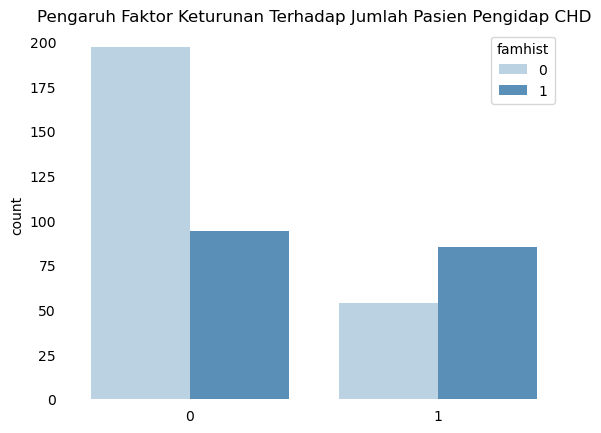

In [72]:
plt.subplot(1, 1, 1)
sns.countplot(x=data['chd'], hue=data['famhist'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Pengaruh Faktor Keturunan Terhadap Jumlah Pasien Pengidap CHD')

Dari perbandingan jumlah pasien penyakit chd tersebut diketahui bahwa,
- Jumlah pasien yang mengalami penyakit jantung koroner ditemukan ada lebih sedikit pada pasien yang tidak memiliki riwayat penyakit yang sama dalam keluarganya
- Jumlah pasien yang mengalami penyakit jantung koroner ditemukan ada lebih banyak pada pasien yang memiliki riwayat penyakit yang sama dalam keluarganya

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [74]:
#Set target label untuk CHD
target = data['chd'].to_numpy()
target

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [75]:
#Konversi fitur ke numpy
tobacco_array = data['tobacco'].to_numpy()
ldl_array = data['ldl'].to_numpy()
adiposity_array = data['adiposity'].to_numpy()
famhist_array = data['famhist'].to_numpy()
age_array = data['age'].to_numpy()

#Mengombinasikan seluruh fitur yang ada
features = list(
    zip(tobacco_array, ldl_array, adiposity_array, famhist_array, age_array))
features

[(12.0, 5.73, 23.11, 1, 52),
 (0.01, 4.41, 28.61, 0, 63),
 (0.08, 3.48, 32.28, 1, 46),
 (7.5, 6.41, 38.03, 1, 58),
 (13.6, 3.5, 27.78, 1, 49),
 (6.2, 6.47, 36.21, 1, 45),
 (4.05, 3.38, 16.2, 0, 38),
 (4.08, 4.59, 14.6, 1, 58),
 (0.0, 3.83, 19.4, 1, 29),
 (0.0, 5.8, 30.96, 1, 53),
 (6.0, 2.95, 32.27, 0, 60),
 (0.0, 1.88, 10.05, 0, 17),
 (0.0, 1.87, 17.21, 0, 15),
 (9.65, 2.29, 17.2, 1, 53),
 (1.53, 2.44, 28.95, 1, 46),
 (10.5, 8.29, 35.36, 1, 53),
 (2.6, 7.46, 34.07, 1, 62),
 (1.61, 1.74, 12.32, 0, 20),
 (7.9, 2.85, 26.5, 1, 44),
 (0.3, 6.38, 33.99, 1, 50),
 (0.6, 3.81, 28.66, 0, 58),
 (9.1, 5.24, 27.55, 0, 61),
 (4.09, 5.55, 31.4, 1, 56),
 (0.0, 6.62, 25.69, 0, 63),
 (2.52, 3.95, 25.63, 0, 45),
 (1.02, 6.33, 23.88, 0, 46),
 (6.6, 5.58, 35.95, 1, 59),
 (8.75, 6.53, 34.02, 0, 41),
 (5.5, 7.1, 25.31, 0, 48),
 (4.26, 4.44, 13.04, 0, 28),
 (3.9, 7.32, 25.05, 0, 32),
 (4.64, 4.55, 30.46, 0, 46),
 (0.0, 2.82, 19.63, 1, 29),
 (11.2, 5.81, 31.85, 1, 58),
 (0.28, 5.8, 33.7, 1, 41),
 (0.04, 3.38,

In [79]:
#Membuat split model training dan testing data
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=None,
    shuffle=False)  # 70% data training & 30% data testing

#set as array
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print("X_Train : "+ str(len(x_train)))
print("X_Train : "+ str(len(x_test)))

# #Lihat contoh data testing
# x_test
# x_test[:, 1] #Contoh untuk data fitur ldl

X_Train : 301
X_Train : 129


In [ ]:
#Inisialisasi fungsi hitung KNN
knn5 = KNeighborsClassifier(n_neighbors=5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Input data model knn
knn5.fit(x_train, y_train)
knn1.fit(x_train, y_train)

#Hasil prediksi perhitungan knn
y_pred_5 = knn5.predict(x_test)
y_pred_1 = knn1.predict(x_test)

y_pred_5

In [ ]:
#Menghitung akurasi dengan sejumlah nilai K
from sklearn.metrics import accuracy_score

#Data akurasi dalam persen
akurasiK5 = round(accuracy_score(y_test, y_pred_5) * 100, 2)
akurasiK1 = round(accuracy_score(y_test, y_pred_1) * 100, 2)

#Nilai K menentukan jumlah tetangga terdekat untuk melakukan klasifikasi
print("Akurasi dengan k=5", akurasiK5)
print("Akurasi dengan k=1", akurasiK1)

In [ ]:
#Lihat Perbandingan Klasifikasi Dengan Nilai K Berbeda

#VARIABEL TESTING
#x_test (feature)
#tobacco [:, 0]
#ldl [:, 1]
#adiposity [:, 2]
#famhist [:, 3]
#age [:, 4]

#y_test = target (chd)

#KNN K=5 Perbandingan hasil yang menderita jantung koroner dengan pengaruh
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=x_test[y_pred_5 == 0, 0],
    y=x_test[y_pred_5 == 0, 1],
    c=y_pred_5[y_pred_5 == 0],
    edgecolors='black',
)

plt.scatter(
    x=x_test[y_pred_5 == 1, 0],
    y=x_test[y_pred_5 == 1, 1],
    c=y_pred_5[y_pred_5 == 1],
    edgecolors='yellow',
)

plt.title("KNN dengan nilai k=5 (Akurasi : %s)" % akurasiK5, fontsize=16)
plt.legend(["Tidak Menderita CHD", "Menderita CHD"])
plt.xlabel("tobacco")
plt.ylabel("ldl")

#KNN K=1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=x_test[y_pred_1 == 0, 0],
    y=x_test[y_pred_1 == 0, 1],
    c=y_pred_1[y_pred_1 == 0],
    edgecolors='black',
)

plt.scatter(
    x=x_test[y_pred_1 == 1, 0],
    y=x_test[y_pred_1 == 1, 1],
    c=y_pred_1[y_pred_1 == 1],
    edgecolors='yellow',
)

plt.title("KNN dengan nilai k=1 (Akurasi : %s)" % akurasiK1, fontsize=16)
plt.legend(["Tidak Menderita CHD", "Menderita CHD"])
plt.xlabel("tobacco")
plt.ylabel("ldl")
plt.show()

In [ ]:
#KNN K=5 Perbandingan hasil yang menderita jantung koroner dengan pengaruh
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=x_test[y_pred_5 == 0, 2],
    y=x_test[y_pred_5 == 0, 4],
    c=y_pred_5[y_pred_5 == 0],
    edgecolors='black',
)

plt.scatter(
    x=x_test[y_pred_5 == 1, 2],
    y=x_test[y_pred_5 == 1, 4],
    c=y_pred_5[y_pred_5 == 1],
    edgecolors='yellow',
)

plt.title("KNN dengan nilai k=5 (Akurasi : %s)" % akurasiK5, fontsize=16)
plt.legend(["Tidak Menderita CHD", "Menderita CHD"])
plt.xlabel("adiposity")
plt.ylabel("age")

#KNN K=1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=x_test[y_pred_1 == 0, 2],
    y=x_test[y_pred_1 == 0, 4],
    c=y_pred_1[y_pred_1 == 0],
    edgecolors='black',
)

plt.scatter(
    x=x_test[y_pred_1 == 1, 2],
    y=x_test[y_pred_1 == 1, 4],
    c=y_pred_1[y_pred_1 == 1],
    edgecolors='yellow',
)

plt.title("KNN dengan nilai k=1 (Akurasi : %s)" % akurasiK1, fontsize=16)
plt.legend(["Tidak Menderita CHD", "Menderita CHD"])
plt.xlabel("adiposity")
plt.ylabel("age")
plt.show()

In [ ]:
#KNN K=5 Perbandingan hasil yang menderita jantung koroner dengan pengaruh
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=x_test[y_pred_5 == 0, 2],
    y=x_test[y_pred_5 == 0, 4],
    c=y_pred_5[y_pred_5 == 0],
    edgecolors='black',
)

plt.scatter(
    x=x_test[y_pred_5 == 1, 2],
    y=x_test[y_pred_5 == 1, 4],
    c=y_pred_5[y_pred_5 == 1],
    edgecolors='yellow',
)

plt.title("KNN dengan nilai k=5 (Akurasi : %s)" % akurasiK5, fontsize=16)
plt.legend(["Tidak Menderita CHD", "Menderita CHD"])
plt.xlabel("adiposity")
plt.ylabel("age")

#KNN K=1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    x=x_test[y_pred_1 == 0, 2],
    y=x_test[y_pred_1 == 0, 4],
    c=y_pred_1[y_pred_1 == 0],
    edgecolors='black',
)

plt.scatter(
    x=x_test[y_pred_1 == 1, 2],
    y=x_test[y_pred_1 == 1, 4],
    c=y_pred_1[y_pred_1 == 1],
    edgecolors='yellow',
)

plt.title("KNN dengan nilai k=1 (Akurasi : %s)" % akurasiK1, fontsize=16)
plt.legend(["Tidak Menderita CHD", "Menderita CHD"])
plt.xlabel("adiposity")
plt.ylabel("age")
plt.show()